In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from experiment_random import *
from tqdm import tqdm
from keras import backend as K

/home/sergei/miniconda3/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(42)
P = 0.123
KLips = 0.321
exp = RandomExperiment(N = [10, 5, 5, 1], P = P, KLips = KLips, activation = 'relu', do_print = True)

Creating network for 10-dimensional input and 1-dimensional output, with 2 hidden layers


In [3]:
exp.get_mean_std_error()

(0.0, 0.0)

100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


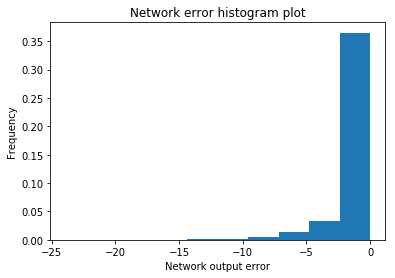

Error; maximal over inputs, average over dropout:
True values array mean: 4.141593 variance 5.307181
Experiment 5.511230 Std 4.730948
Equation   10.209705 Std 13.530540
Tightness  54.0% Std 35.0%


(5.5112295, 4.7309484, 10.209704693423909, 13.530540356133331, 5.3071814)

In [4]:
exp.run(inputs = 50)

In [7]:
P = 0.1
Ks = np.logspace(-5, 5, 11)
results = [RandomExperiment(P = [P] * 2, N = [10, 5, 5, 1], KLips = K, activation = 'relu').run(inputs = 20, randn = 0, do_tqdm = False, do_plot = False, do_print = False) for K in tqdm(Ks)]

100%|██████████| 11/11 [03:01<00:00, 16.53s/it]


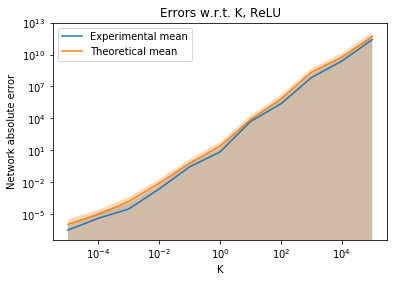

In [8]:
mean_exp, std_exp, mean_bound, std_bound, std_true = [np.array(x) for x in zip(*results)]
plt.figure()
plt.title('Errors w.r.t. K, ReLU')
plt.xlabel('K')
plt.ylabel('Network absolute error')
plt.plot(Ks, mean_exp, label = 'Experimental mean')
plt.fill_between(Ks, mean_exp - std_exp, mean_exp + std_exp, alpha = 0.3)
plt.plot(Ks, mean_bound, label = 'Theoretical mean')
plt.fill_between(Ks, mean_bound - std_bound, mean_bound + std_bound, alpha = 0.3)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()